In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
path = r"I:\CME538 Project\CME538 Project\processed data ontario only\250m"

In [3]:
os.listdir(path)

['ONage2001_250m',
 'ONage2001_250m.tif',
 'ONage2001_250m.tif.aux.xml',
 'ONage2011_250m',
 'ONage2011_250m.tif',
 'ONage2011_250m.tif.aux.xml',
 'Onage2019_250m',
 'Onage2019_250m.tif',
 'Onage2019_250m.tif.aux.xml',
 'ONharvest1985_2020_250m',
 'ONharvest1985_2020_250m.tif',
 'ONharvest1985_2020_250m.tif.aux.xml',
 'Ontario_fire_in_forest_coordinates.csv.gz',
 'Ontario_Forest_Data.csv.gz',
 'Ontario_Forest_Data_Points.csv.gz',
 'ONvol2001_250m',
 'ONvol2001_250m.tif',
 'ONvol2001_250m.tif.aux.xml',
 'ONvol2011_250m',
 'ONvol2011_250m.tif',
 'ONvol2011_250m.tif.aux.xml',
 'ONvol2015_250m',
 'ONvol2015_250m.tif',
 'ONvol2015_250m.tif.aux.xml',
 'ON_forest_and_fires.csv.gz']

In [4]:
filename = os.listdir(path)[12]
filename

'Ontario_fire_in_forest_coordinates.csv.gz'

In [5]:
ON_boundary = gpd.read_file(r"I:\CME538 Project\CME538 Project\ontario boundary\Province\Province.shp")

In [6]:
ON_boundary = ON_boundary.to_crs(4269)

<Axes: >

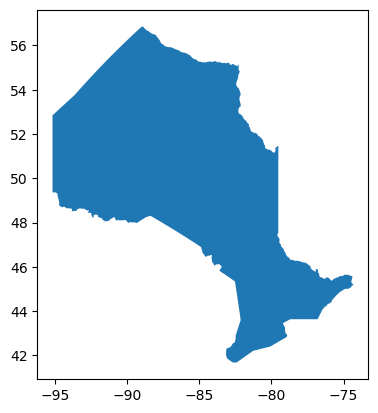

In [7]:
ON_boundary.plot()

In [8]:
ON_joined = pd.read_csv(path+"\\"+filename,compression='gzip',index_col=0)
ON_joined.head()

C:\Users\Antoine Pepin\AppData\Local\Temp\ipykernel_4772\3239562101.py:1: DtypeWarning: Columns (4,11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  ON_joined = pd.read_csv(path+"\\"+filename,compression='gzip',index_col=0)


,index,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,...,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,point_geometry,area_sqm,buffer_radius,buffer_geometry,pixel_geometry,area_intersect,area_intersect_perc
index_right,,,,,,,,,,,,,,,,,,,,,
232,9490,ON,SAU4,NaN,47.013000,-84.775200,2010,4,1,2010-04-01,...,6b,Boreal Shield East,Bouclier bordal,POINT Z (6742500.693253994 1237440.2330232034 0),5000.0,39.894228,POLYGON ((6742540.587482034 1237440.2330232034...,"POLYGON ((6742553.429325026 1237567.62007252, ...",4991.971965,0.079872
1222,19897,ON,WAW14,NaN,48.301409,-86.152606,2021,7,20,2021-07-20,...,6b,Boreal Shield East,Bouclier bordal,POINT Z (6624524.966573114 1370277.4113174314 0),2000.0,25.231325,POLYGON ((6624550.197898334 1370277.4113174314...,POLYGON ((6624707.836761105 1370531.8213195344...,368.653991,0.005898
1224,19897,ON,WAW14,NaN,48.301409,-86.152606,2021,7,20,2021-07-20,...,6b,Boreal Shield East,Bouclier bordal,POINT Z (6624524.966573114 1370277.4113174314 0),2000.0,25.231325,POLYGON ((6624550.197898334 1370277.4113174314...,POLYGON ((6624695.5263683535 1370282.124595029...,1628.134795,0.026050
3409,8574,ON,WAW42,NaN,47.753600,-85.887200,2006,7,22,2006-07-22,...,6b,Boreal Shield East,Bouclier bordal,POINT Z (6649926.3508799 1311211.8213523685 0),5000.0,39.894228,"POLYGON ((6649966.24510794 1311211.8213523685,...","POLYGON ((6650067.555512638 1311211.10685281, ...",2991.405964,0.047862
3412,8574,ON,WAW42,NaN,47.753600,-85.887200,2006,7,22,2006-07-22,...,6b,Boreal Shield East,Bouclier bordal,POINT Z (6649926.3508799 1311211.8213523685 0),5000.0,39.894228,"POLYGON ((6649966.24510794 1311211.8213523685,...",POLYGON ((6650079.865905387 1311460.8035773216...,2000.566001,0.032009


In [9]:
ON_joined.geometry[0].split()[1].strip("()")

AttributeError: 'DataFrame' object has no attribute 'geometry'

In [19]:
ON_joined['lon']=ON_joined.geometry.apply(lambda x: float(x.split()[1].strip("()")))
ON_joined['lat']=ON_joined.geometry.apply(lambda x: float(x.split()[2].strip("()")))

In [20]:
ON_joined.head()

,geometry,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat
0,POINT (-84.89050068106383 46.90605152265829),104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.890501,46.906052
1,POINT (-84.8857431620178 46.91230297813016),104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.885743,46.912303
2,POINT (-84.88741043858013 46.91926057431198),104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.887410,46.919261
3,POINT (-84.88419733230447 46.918907518758466),104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.884197,46.918908
4,POINT (-84.74856488744744 46.962634326603904),57.0,NaN,NaN,NaN,38.69,NaN,NaN,-84.748565,46.962634


In [22]:
ON_joined.to_csv(path+"\\"+filename,compression = 'gzip',header=True)

In [119]:
def linearreg(data,columns):
    """Fucntion that takes in an array list of columns for which the data is needed for regression"""
    x=[]
    for col in columns:
        x.append(data.to_frame()[col])
        
    return x
    
    

In [120]:
ON_joined.apply(lambda row: linearreg(row,'age_2001'),axis=1)

KeyError: 'a'

ValueError: could not convert string to float: 'O'

In [44]:
ON_joined.drop(columns=['geometry'],axis=1,inplace=True)
ON_joined.head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,2001_2011,2001_2019,2011_2019,lon,lat
0,104.0,NaN,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,-84.890501,46.906052
1,104.0,NaN,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,-84.885743,46.912303
2,104.0,NaN,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,-84.887410,46.919261
3,104.0,NaN,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,-84.884197,46.918908
4,57.0,NaN,NaN,NaN,38.69,NaN,NaN,NaN,NaN,NaN,-84.748565,46.962634


In [48]:
ON_joined_gdf = gpd.GeoDataFrame(ON_joined,geometry=gpd.points_from_xy(ON_joined.lon,ON_joined.lat))

In [49]:
ON_joined_gdf.head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,2001_2011,2001_2019,2011_2019,lon,lat,geometry
0,104.0,NaN,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,-84.890501,46.906052,POINT (-84.89050 46.90605)
1,104.0,NaN,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,-84.885743,46.912303,POINT (-84.88574 46.91230)
2,104.0,NaN,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,-84.887410,46.919261,POINT (-84.88741 46.91926)
3,104.0,NaN,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,-84.884197,46.918908,POINT (-84.88420 46.91891)
4,57.0,NaN,NaN,NaN,38.69,NaN,NaN,NaN,NaN,NaN,-84.748565,46.962634,POINT (-84.74856 46.96263)


In [86]:
ON_joined_gdf[(ON_joined_gdf['age_2019']<22)| (ON_joined_gdf['2001_2019'].between(16,22))]

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,2001_2011,2001_2019,2011_2019,lon,lat,geometry
11,47.0,86.0,17.0,2002.0,69.57,104.97,16.5,39.0,-30.0,-69.0,-84.752905,46.972155,POINT (-84.75291 46.97215)
20,75.0,75.0,91.0,NaN,173.80,199.16,275.5,0.0,16.0,16.0,-84.767420,46.980546,POINT (-84.76742 46.98055)
21,86.0,65.0,108.0,NaN,137.86,174.34,30.2,-21.0,22.0,43.0,-84.764203,46.980189,POINT (-84.76420 46.98019)
30,51.0,52.0,67.0,2002.0,84.59,65.49,128.4,1.0,16.0,15.0,-84.752383,46.974356,POINT (-84.75238 46.97436)
41,65.0,84.0,82.0,NaN,138.69,168.45,NaN,19.0,17.0,-2.0,-84.753508,46.983519,POINT (-84.75351 46.98352)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15012833,67.0,79.0,88.0,NaN,74.18,156.93,101.7,12.0,21.0,9.0,-76.254712,44.771139,POINT (-76.25471 44.77114)
15012876,69.0,76.0,85.0,NaN,100.38,137.96,NaN,7.0,16.0,9.0,-76.271347,44.770118,POINT (-76.27135 44.77012)
15013067,65.0,70.0,83.0,NaN,99.05,145.12,47.4,5.0,18.0,13.0,-76.248778,44.769856,POINT (-76.24878 44.76986)
15013069,72.0,62.0,89.0,NaN,78.71,100.09,125.7,-10.0,17.0,27.0,-76.244910,44.771327,POINT (-76.24491 44.77133)


In [87]:
ON_joined_gdf_red = ON_joined_gdf[(ON_joined_gdf['age_2019']<22)| (ON_joined_gdf['2001_2019'].between(16,22))]
print(len(ON_joined_gdf_red))
ON_joined_gdf_red.head()

1236401


,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,2001_2011,2001_2019,2011_2019,lon,lat,geometry
11,47.0,86.0,17.0,2002.0,69.57,104.97,16.5,39.0,-30.0,-69.0,-84.752905,46.972155,POINT (-84.75291 46.97215)
20,75.0,75.0,91.0,NaN,173.80,199.16,275.5,0.0,16.0,16.0,-84.767420,46.980546,POINT (-84.76742 46.98055)
21,86.0,65.0,108.0,NaN,137.86,174.34,30.2,-21.0,22.0,43.0,-84.764203,46.980189,POINT (-84.76420 46.98019)
30,51.0,52.0,67.0,2002.0,84.59,65.49,128.4,1.0,16.0,15.0,-84.752383,46.974356,POINT (-84.75238 46.97436)
41,65.0,84.0,82.0,NaN,138.69,168.45,NaN,19.0,17.0,-2.0,-84.753508,46.983519,POINT (-84.75351 46.98352)


KeyboardInterrupt: 

<Figure size 2000x2000 with 0 Axes>

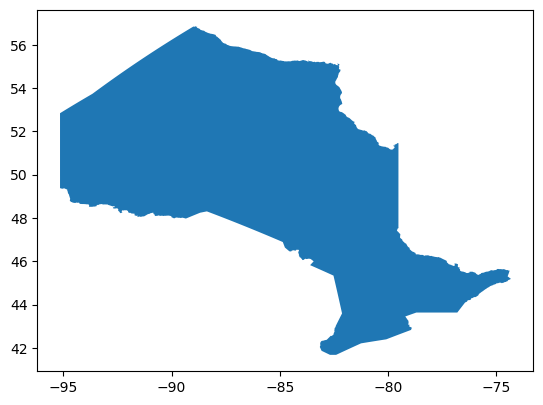

In [93]:
col = 'age_2001'
temp = ON_joined_gdf_red[['geometry',col]]
plt.figure(figsize=[20,20])

ax = ON_boundary.plot()
temp.plot(ax=ax,column = col,markersize=0.00001,legend=True)
plt.title("Age of Ontario's Forest in 2001")
plt.xlabel('lon')
plt.ylabel('lat')
plt.savefig(path+col+".png",dpi=2400)

plt.show()

<Figure size 2000x2000 with 0 Axes>

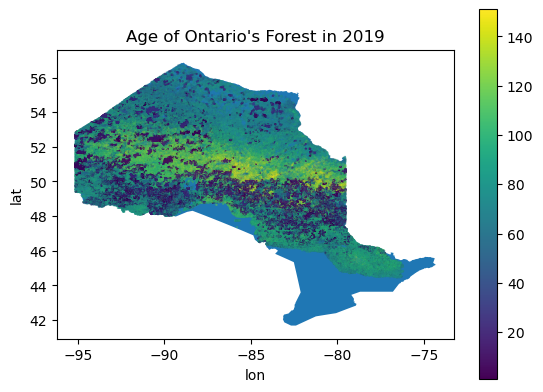

In [91]:
col = 'age_2019'
temp = ON_joined_gdf_red[['geometry',col]]
plt.figure(figsize=[20,20])

ax = ON_boundary.plot()
temp.plot(ax=ax,column = col,markersize=0.00001,legend=True)
plt.title("Age of Ontario's Forest in 2019")
plt.xlabel('lon')
plt.ylabel('lat')
plt.savefig(path+col+".png",dpi=2400)

plt.show()

<Figure size 2000x2000 with 0 Axes>

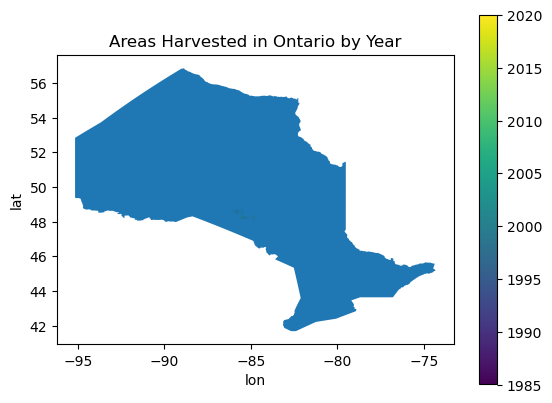

In [98]:
col = 'year_harvested'
temp = ON_joined_gdf_red[['geometry',col]]
plt.figure(figsize=[20,20])

ax = ON_boundary.plot()
temp.head(10000).plot(ax=ax,column = col,marker = '.',markersize=0.000001,legend=True)
plt.title("Areas Harvested in Ontario by Year")
plt.xlabel('lon')
plt.ylabel('lat')
plt.savefig(path+col+".png",dpi=4800)

plt.show()